In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import RidgeCV
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import PolynomialFeatures

# Regression using pipeline

In [3]:
data_12Aug = pd.read_csv('data/12Aug.csv')
data_12Aug.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [4]:
data_12Aug.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


## Training Features

1. R&D Spend 	
2. Administration 	
3. Marketing Spend 	
4. State

### Categoriacal feature
    1. State
    
### Numeric feature
    1. R&D Spend
    2. Administration
    3. Marketing Spend

## Testing Feature
    1. Profit
    


In [31]:
numeric_features = ['R&D Spend', 	'Administration' ,	'Marketing Spend']
numeric_transformer = Pipeline(
    steps= [('scaler', StandardScaler())]
)

categorical_features = ['State']
categorical_transformer = Pipeline(
    steps = [('encoder', OneHotEncoder(sparse_output=False, handle_unknown='ignore'))]
)

In [33]:
preprocessing = ColumnTransformer(
    transformers = [('numeric', numeric_transformer, numeric_features),
                   ('categorical', categorical_transformer, categorical_features)]
)

In [10]:
reg = Pipeline(
    steps=[('preprocessing', preprocessing), 
          ('regression', RidgeCV())]
)
reg

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['R&D Spend',
                                                   'Administration',
                                                   'Marketing Spend']),
                                                 ('categorical',
                                                  Pipeline(steps=[('encoder',
                                                                   OneHotEncoder())]),
                                                  ['State'])])),
                ('regression', RidgeCV())])

In [11]:
data_12Aug.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [18]:
# Train test split
X = data_12Aug.drop('Profit', axis=1)
y = data_12Aug['Profit']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

print(f"X_train.shape: {X_train.shape}")
print(f"X_test.shape: {X_test.shape}")
print(f"y_train.shape: {y_train.shape}")
print(f"y_test.shape: {y_test.shape}")

X_train.shape: (37, 4)
X_test.shape: (13, 4)
y_train.shape: (37,)
y_test.shape: (13,)


In [19]:
# Model Training

reg.fit(X_train, y_train)
print(f"Training accuracy: {reg.score(X_train, y_train)}")

Training accuracy: 0.9707773878012527


In [23]:
reg['regression'].coef_

array([34681.98489723, -2214.99644988,  2387.19105592,  1897.9047285 ,
       -1740.88272158,  -157.02200692])

In [34]:
print(f"Test accuracy: {reg.score(X_test, y_test)}")

Test accuracy: 0.876367027335736


In [35]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, root_mean_squared_error

y_test_predict = reg.predict(X_test)

print(f"mean_absolute_error: {mean_absolute_error(y_test, y_test_predict)}")
print(f"mean_squared_error: {mean_squared_error(y_test, y_test_predict)}")
print(f"root_mean_squared_error: {root_mean_squared_error(y_test, y_test_predict)}")

mean_absolute_error: 11517.013768799818
mean_squared_error: 224105091.9719828
root_mean_squared_error: 14970.140011769523


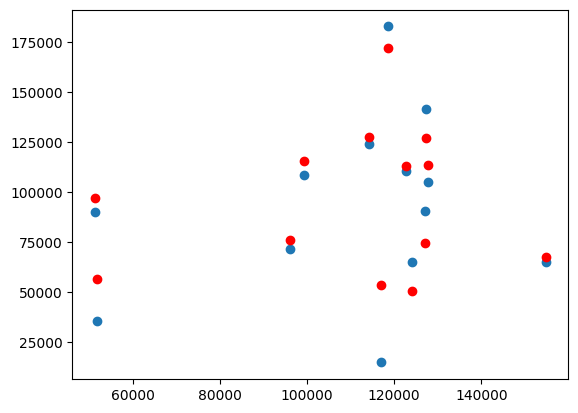

In [42]:
plt.scatter(X_test.iloc[:, 1], y_test)
plt.scatter(X_test.iloc[:, 1], y_test_predict, c='r')
plt.show()

# Logistic regressionn

In [43]:
data = pd.read_csv('data/13Aug.csv')
data.head()

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


Text(0, 0.5, 'Esimated Salary')

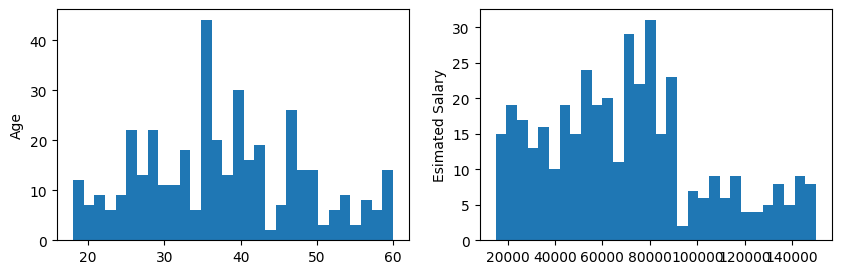

In [47]:
fig, ax = plt.subplots(1,2, figsize=(10,3))

ax[0].hist(data['Age'], bins=30)
ax[0].set_ylabel('Age')
ax[1].hist(data['EstimatedSalary'], bins=30)
ax[1].set_ylabel('Esimated Salary')

In [50]:
data[['Purchased']].value_counts()

Purchased
0            257
1            143
Name: count, dtype: int64

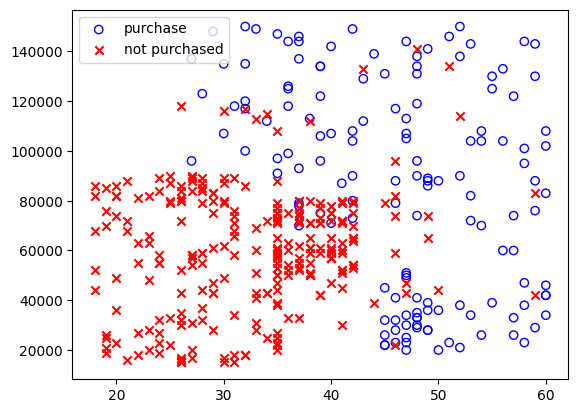

In [63]:
purchased = data['Purchased'].values == 1
not_purchased = data['Purchased'].values == 0

plt.scatter(data.iloc[purchased, 0], data.iloc[purchased, 1], facecolors='none', edgecolors='b', label='purchase')
plt.scatter(data.iloc[not_purchased, 0], data.iloc[not_purchased, 1],marker='x', c='r', label='not purchased')
plt.legend()
plt.show()

In [44]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Age              400 non-null    int64
 1   EstimatedSalary  400 non-null    int64
 2   Purchased        400 non-null    int64
dtypes: int64(3)
memory usage: 9.5 KB


## Numeric feature

- Age
- EstimatedSalary

In [85]:
numeric_features = ['Age', 'EstimatedSalary']
preprocessing = Pipeline(
    steps=[('polynomical', PolynomialFeatures(degree=2, include_bias=False)),('scale', StandardScaler(),)]
)
## right way to do this 
'''
preprocessing = ColumnTransformer(
    transformers=[('poly_scale', poly_scale, numeric_features)]
)

preprocessing = ColumnTransformer(
    transformers=[('polynomical', PolynomialFeatures(degree=2, include_bias=False)),('scale', StandardScaler(),)]
)

poly_scale.set_output(transform='pandas')

poly_scale.fit_transform(X_train).head()
'''

preprocessing

Pipeline(steps=[('polynomical', PolynomialFeatures(include_bias=False)),
                ('scale', StandardScaler())])

In [86]:
logistic_reg = Pipeline(
    steps=[('preprocessing', preprocessing),
          ('logistic_reg', LogisticRegression())]
)

logistic_reg

Pipeline(steps=[('preprocessing',
                 Pipeline(steps=[('polynomical',
                                  PolynomialFeatures(include_bias=False)),
                                 ('scale', StandardScaler())])),
                ('logistic_reg', LogisticRegression())])

## Train test split

In [87]:
X = data[numeric_features]
y = data['Purchased']

X_train, X_test, y_train, y_test = train_test_split(X, y)

print(f"X_train.shape: {X_train.shape}")
print(f"X_test.shape: {X_test.shape}")
print(f"y_train.shape: {y_train.shape}")
print(f"y_test.shape: {y_test.shape}")

X_train.shape: (300, 2)
X_test.shape: (100, 2)
y_train.shape: (300,)
y_test.shape: (100,)


In [88]:
logistic_reg.fit(X_train, y_train)
print(f"Training accuracy: {logistic_reg.score(X_train, y_train)}")

Training accuracy: 0.9033333333333333


In [89]:
print(f"Test accuracy: {logistic_reg.score(X_test, y_test)}")

Test accuracy: 0.87
